In [1]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

## Generate data

$f(x)=\sin(2\pi x)+0.5\sqrt{1-x^2}+x$

In [2]:
def my_objective(X):
    Y=np.sin(2*pi*X)+0.5*(1-X**2)**(1/2)+X
    return Y

In [3]:
np.random.seed(1)
# X=np.random.uniform(0,0.95,size=100,requires_grad=False)
# X = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.0, 034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.01, 0.04040404040404041, 0.08080808080808081, 0.12121212121212122, 0.16161616161616163, 0.20202020202020202, 0.24242424242424243, 0.2828282828282828, 0.32323232323232326, 0.36363636363636365, 0.40404040404040403, 0.4444444444444444, 0.48484848484848486, 0.5252525252525253, 0.5656565656565656, 0.6060606060606061, 0.6464646464646465, 0.6868686868686869, 0.7272727272727273, 0.7676767676767676, 0.8080808080808081, 0.8484848484848485, 0.8888888888888888, 0.9292929292929293, 0.9696969696969697, 1.0101010101010102, 1.0505050505050506, 1.0909090909090908, 1.1313131313131313, 1.1717171717171717, 1.2121212121212122, 1.2525252525252526, 1.292929292929293, 1.3333333333333333, 1.3737373737373737, 1.4141414141414141, 1.4545454545454546, 1.494949494949495, 1.5353535353535352, 1.5757575757575757, 1.6161616161616161, 1.6565656565656566, 1.696969696969697, 1.7373737373737375, 1.7777777777777777, 1.8181818181818181, 1.8585858585858586, 1.898989898989899, 1.9393939393939394, 1.97979797979798, 2.0202020202020203, 2.0606060606060606, 2.101010101010101, 2.1414141414141414, 2.1818181818181817, 2.2222222222222223, 2.2626262626262625, 2.303030303030303, 2.3434343434343434, 2.3838383838383836, 2.4242424242424243, 2.4646464646464645, 2.505050505050505, 2.5454545454545454, 2.585858585858586, 2.6262626262626263, 2.6666666666666665, 2.707070707070707, 2.7474747474747474, 2.787878787878788, 2.8282828282828283, 2.8686868686868685, 2.909090909090909, 2.9494949494949494, 2.98989898989899, 3.0303030303030303, 3.0707070707070705, 3.111111111111111, 3.1515151515151514, 3.191919191919192, 3.2323232323232323, 3.272727272727273, 3.313131313131313, 3.3535353535353534, 3.393939393939394, 3.4343434343434343, 3.474747474747475, 3.515151515151515, 3.5555555555555554, 3.595959595959596, 3.6363636363636362, 3.676767676767677, 3.717171717171717, 3.757575757575758, 3.797979797979798, 3.8383838383838382, 3.878787878787879, 3.919191919191919, 3.95959595959596, 4.0])

X = np.array([0.0, 0.04020100502512563, 0.08040201005025126, 0.12060301507537688, 0.16080402010050251, 0.20100502512562815, 0.24120603015075376, 0.2814070351758794, 0.32160804020100503, 0.36180904522613067, 0.4020100502512563, 0.44221105527638194, 0.4824120603015075, 0.5226130653266332, 0.5628140703517588, 0.6030150753768844, 0.6432160804020101, 0.6834170854271356, 0.7236180904522613, 0.7638190954773869, 0.8040201005025126, 0.8442211055276382, 0.8844221105527639, 0.9246231155778895, 0.964824120603015, 1.0050251256281406, 1.0452261306532664, 1.085427135678392, 1.1256281407035176, 1.1658291457286432, 1.2060301507537687, 1.2462311557788945, 1.2864321608040201, 1.3266331658291457, 1.3668341708542713, 1.407035175879397, 1.4472361809045227, 1.4874371859296482, 1.5276381909547738, 1.5678391959798994, 1.6080402010050252, 1.6482412060301508, 1.6884422110552764, 1.728643216080402, 1.7688442211055277, 1.8090452261306533, 1.849246231155779, 1.8894472361809045, 1.92964824120603, 1.9698492462311559, 2.0100502512562812, 2.050251256281407, 2.090452261306533, 2.130653266331658, 2.170854271356784, 2.2110552763819094, 2.251256281407035, 2.291457286432161, 2.3316582914572863, 2.371859296482412, 2.4120603015075375, 2.4522613065326633, 2.492462311557789, 2.5326633165829144, 2.5728643216080402, 2.613065326633166, 2.6532663316582914, 2.693467336683417, 2.7336683417085426, 2.7738693467336684, 2.814070351758794, 2.8542713567839195, 2.8944723618090453, 2.9346733668341707, 2.9748743718592965, 3.0150753768844223, 3.0552763819095476, 3.0954773869346734, 3.135678391959799, 3.1758793969849246, 3.2160804020100504, 3.2562814070351758, 3.2964824120603016, 3.336683417085427, 3.3768844221105527, 3.4170854271356785, 3.457286432160804, 3.4974874371859297, 3.5376884422110555, 3.577889447236181, 3.6180904522613067, 3.658291457286432, 3.698492462311558, 3.7386934673366836, 3.778894472361809, 3.819095477386935, 3.85929648241206, 3.899497487437186, 3.9396984924623117, 3.979899497487437, 4.0201005025125625, 4.060301507537688, 4.100502512562814, 4.14070351758794, 4.180904522613066, 4.221105527638191, 4.261306532663316, 4.301507537688442, 4.341708542713568, 4.381909547738694, 4.422110552763819, 4.4623115577889445, 4.50251256281407, 4.542713567839196, 4.582914572864322, 4.623115577889447, 4.663316582914573, 4.703517587939698, 4.743718592964824, 4.78391959798995, 4.824120603015075, 4.864321608040201, 4.9045226130653266, 4.944723618090452, 4.984924623115578, 5.025125628140704, 5.065326633165829, 5.105527638190955, 5.1457286432160805, 5.185929648241206, 5.226130653266332, 5.266331658291457, 5.306532663316583, 5.346733668341709, 5.386934673366834, 5.42713567839196, 5.467336683417085, 5.507537688442211, 5.547738693467337, 5.5879396984924625, 5.628140703517588, 5.668341708542713, 5.708542713567839, 5.748743718592965, 5.788944723618091, 5.8291457286432165, 5.869346733668341, 5.909547738693467, 5.949748743718593, 5.989949748743719, 6.030150753768845, 6.0703517587939695, 6.110552763819095, 6.150753768844221, 6.190954773869347, 6.231155778894473, 6.271356783919598, 6.311557788944723, 6.351758793969849, 6.391959798994975, 6.432160804020101, 6.472361809045226, 6.5125628140703515, 6.552763819095477, 6.592964824120603, 6.633165829145729, 6.673366834170854, 6.71356783919598, 6.7537688442211055, 6.793969849246231, 6.834170854271357, 6.874371859296482, 6.914572864321608, 6.954773869346734, 6.994974874371859, 7.035175879396985, 7.075376884422111, 7.115577889447236, 7.155778894472362, 7.1959798994974875, 7.236180904522613, 7.276381909547739, 7.316582914572864, 7.35678391959799, 7.396984924623116, 7.437185929648241, 7.477386934673367, 7.517587939698492, 7.557788944723618, 7.597989949748744, 7.63819095477387, 7.678391959798995, 7.71859296482412, 7.758793969849246, 7.798994974874372, 7.839195979899498, 7.8793969849246235, 7.919597989949748, 7.959798994974874, 8.0])

In [4]:
# Y=my_objective(X)
# Y= np.array([0.38399110000000003, 0.3840170742666061, 0.3839828869051081, 0.38388080507535627, 0.3837084525832887, 0.3834687819772455, 0.3831695665609072, 0.3828221367988043, 0.38243947475520884, 0.38203501373261006, 0.38162167318117335, 0.38121007360346926, 0.380808830348092, 0.3804246331233159, 0.3800622459970958, 0.3797245073970667, 0.3794125382257852, 0.3791264976216649, 0.3788657684834297, 0.3786292586496905, 0.37841540822153996, 0.3782222796510877, 0.3780481110866354, 0.3778912225937809, 0.37774994280676005, 0.37762260892844646, 0.37750756673035174, 0.37740317055262523, 0.37730781807501274, 0.37722039327314166])
# Y=np.array([-1.0, -0.7580154990560892, -0.5161437433812334, -0.2766048537207341, -0.041802674575424616, 0.1858833970784918, 0.4042480529018171, 0.6114303693104511, 0.8059786334143284, 0.9869146162730239, 1.153731102545101, 1.306287083509873, 1.4447964009065875, 1.569756535500465, 1.6818505996838096, 1.7818607204031671, 1.870659268765975, 1.9491714805132159, 2.01826958097265, 2.078783646966857, 2.131508852922671, 2.177205470871178, 2.2165986052292843, 2.2503340570846433, 2.278941382471026, 2.3029040274854604, 2.3226653388639713, 2.338628563981579, 2.351156850852302, 2.3605517871991557])
# Y=np.array([383.9911, 384.01706751326924, 383.9828885247102, 383.8808125971688, 383.7084372056539, 383.4687638670096, 383.1696101373725, 382.8221351721135, 382.4394049518417, 382.03499070163184, 381.62150213890624, 381.2097329925458, 380.80859013730577, 380.4246713030564, 380.062383889052, 379.7245813646966, 379.4126024886706, 379.12660170864535, 378.8658653877571, 378.62924003544396, 378.41531030130216, 378.2223989750864, 378.0485689853088, 377.89187938330747, 377.75062031062566, 377.62313745605, 377.50784802000675, 377.4032407145614, 377.30787576341896, 377.2204251497879])
Y=np.array([-1.0, -0.7178423005365747, -0.43632371359298405, -0.15905115051051574, 0.11016251538108233, 0.36768523267427106, 0.6104197927413573, 0.8360101353235583, 1.0429693532077005, 1.23063613337432, 1.3990206337281037, 1.5487318857213899, 1.680785524451122, 1.7964075596335414, 1.8969884820003418, 1.9839762549063924, 2.058723202296767, 2.1225130757166832, 2.1765651511885395, 2.222032824583652, 2.2599216504892703, 2.2910528291607006, 2.3161670191787636, 2.3359308031988233, 2.3509366879507883, 2.3616902924936376, 2.368564381221564, 2.3718660618186753, 2.3718632141092066, 2.3687844989452564, 2.3628193582067847, 2.354110254715254, 2.342725111479321, 2.3286981862031024, 2.3120458352258804, 2.2927665069806262, 2.2708407419940086, 2.246231172886385, 2.2188863302982784, 2.1887163334522017, 2.1556068583527157, 2.1194502531304766, 2.080145829466687, 2.0375998625930927, 1.991725591291986, 1.9424432178962057, 1.8896871125041586, 1.8334257698861445, 1.7736050509391668, 1.710224814703345, 1.6433504414415416, 1.5731128326393575, 1.4997084110051364, 1.4233991204699592, 1.3445124261876504, 1.2634413145347767, 1.1805689653974947, 1.0964492988302417, 1.011823316814085, 0.9274301189147391, 0.8440064160677738, 0.7622865305786044, 0.6830023961225025, 0.606883557744591, 0.5346571718598393, 0.46704800625307125, 0.40467187630160206, 0.34803802889909136, 0.2976327360906578, 0.25381584948254715, 0.21682070475169604, 0.18675412164573174, 0.16359640398297082, 0.1472013396524182, 0.13735526757134844, 0.13380640673262442, 0.136197941101579, 0.1441183637862906, 0.15710166114573604, 0.1746273127897928, 0.19612029157923624, 0.2209510636257426, 0.2484707371840501, 0.278143781147551, 0.30936950142263414, 0.3415712441843202, 0.374211045805031, 0.4067896328545907, 0.43884642210022307, 0.46995963502920113, 0.49976904885066925, 0.5279488149406775, 0.5542073614031748, 0.5783076763598713, 0.6000673079502392, 0.6193583643315126, 0.6361075136786879, 0.6502959841845231, 0.6619303415974014, 0.6710199641758153, 0.6776155185641203, 0.6817919766144752, 0.6836485645616655, 0.683308763023103, 0.6809203069988258, 0.6766551858714988, 0.6707096434064127, 0.663288103878447, 0.6545384642348404, 0.6446637193776567, 0.633870248317425, 0.6223573220750768, 0.6103171036819461, 0.5979346481797696, 0.5853879026206865, 0.5728477060672383, 0.5604777895923682, 0.548434646108773, 0.5368447426160095, 0.5258305221943436, 0.5155130983393701, 0.5059936574769985, 0.4973534589634547, 0.4896538350852793, 0.4829361910593291, 0.4772220050327768, 0.47251282808310907, 0.46879759666674303, 0.46606840729183147, 0.4643026561226017, 0.46346729088960187, 0.46351906732777803, 0.4644045491764742, 0.46606010817943205, 0.4684119240847912, 0.471375984645089, 0.47485808561726073, 0.47875572598696053, 0.48301207923657, 0.4875531002076258, 0.49228912602729963, 0.49713695457095, 0.5020198444621224, 0.5068675150725495, 0.5116161465221503, 0.516208379679031, 0.5205933161594847, 0.5247265183279918, 0.5285700092972188, 0.5320925371622816, 0.5352747665154334, 0.538095667375137, 0.5405369404939552, 0.542587021278572, 0.5442410797897933, 0.5455010207425469, 0.5463754835058824, 0.5468798421029709, 0.5470362052111055, 0.5468734161617007, 0.546420299431777, 0.5456935643036928, 0.5447204472785079, 0.5435290767142611, 0.5421478121457335, 0.5406052442844488, 0.5389301950186727, 0.5371517174134133, 0.5352990957104212, 0.5334018453281894, 0.531489712861953, 0.5295926760836897, 0.5277409439421195, 0.5259649565627045, 0.5242950326413108, 0.5227314086328725, 0.5212764522870067, 0.519946114011852, 0.5187531570184782, 0.5177071573208869, 0.5168145037360105, 0.5160783978837129, 0.5154988541867895, 0.5150726998709668, 0.514793574964903, 0.5146519323001871, 0.5146350375113399, 0.5147337761600446, 0.5149453266406702, 0.515259385899831, 0.5156653015870173, 0.5161521675188323, 0.516708823678992, 0.5173238562183252, 0.5179855974547737, 0.518682125873392, 0.5194012661263475, 0.5201305890329203, 0.5208574115795035, 0.521568796919603])


In [5]:
print(X.shape)
print(Y.shape)

(200,)
(200,)


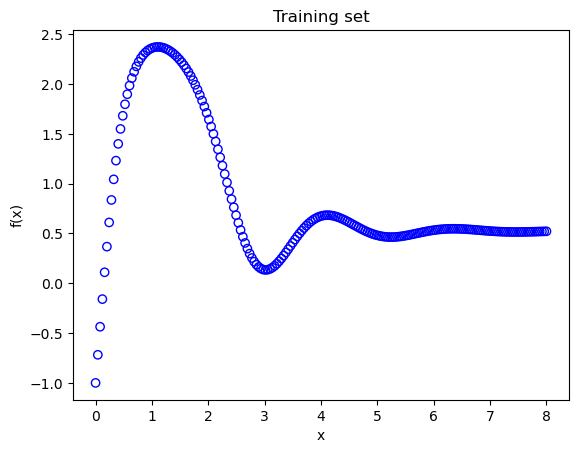

In [6]:
# plot data
plt.scatter(X,Y,facecolors='none', edgecolors='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Training set')
plt.savefig('xsinx_target.png')
plt.show()

## Set Device

In [7]:
num_qubits=6
dev=qml.device('default.qubit', wires=num_qubits)

## Define embedding layer

In [8]:
# define my own embedding layer
def myembedding(x,wires):
    qml.RY(np.arcsin(x/8), wires=wires[0])
    qml.RY(2*pi*x, wires=wires[1])

## Define the Hamiltonian matrix transformation layer

In [9]:
def Ham():
    obs=[]
    for j in range(num_qubits):
        obs.append(qml.PauliX(j))
        for k in range(j):
            obs.append(qml.PauliZ(j)@qml.PauliZ(k))
    coeffs=np.random.uniform(-1,1,len(obs))*10
    qml.Hamiltonian(coeffs, obs)

## Define ansatze

In [10]:
# define ansastz layer
def layer(theta):
    
    # Apply Hamiltonian matrix
    Ham()
    
    # Apply H gate
    qml.Hadamard(0)
    
    # rotations on qubits
    qml.RY(theta[0],wires=0)
    qml.RY(theta[1],wires=1)
    
    # CNOT
    qml.CNOT(wires=[0, 1])

In [11]:
@qml.qnode(dev)
def quantum_net(theta,x):
    
    # encode data
    myembedding(x,wires=range(num_qubits))
    
    # parameterized circuit layers
    for v in theta: # (for lool along with the first dimension)
        # print(v)
        # Ham()
        layer(v)
    
    qml.Hadamard(0)
    
    return qml.expval(qml.PauliZ(0))

In [12]:
num_layers=4
theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits),requires_grad=True)
print(theta.shape)
print(theta)

(4, 6)
[[2.62022653e+00 4.52593227e+00 7.18638172e-04 1.89961158e+00
  9.22094457e-01 5.80180502e-01]
 [1.17030742e+00 2.17122208e+00 2.49296356e+00 3.38548539e+00
  2.63387681e+00 4.30536110e+00]
 [1.28461137e+00 5.51737457e+00 1.72081323e-01 4.21267161e+00
  2.62200340e+00 3.51035172e+00]
 [8.82077150e-01 1.24470837e+00 5.03122651e+00 6.08376691e+00
  1.96930219e+00 4.34999129e+00]]


In [13]:
quantum_net(theta,0)

tensor(0.28099305, requires_grad=True)

In [14]:
print(qml.draw(quantum_net)(theta,0))

0: ──RY(0.00)──H─────────RY(2.62)─╭●──H─────────RY(1.17)─╭●──H─────────RY(1.28)─╭●──H───────
1: ──RY(0.00)──RY(4.53)───────────╰X──RY(2.17)───────────╰X──RY(5.52)───────────╰X──RY(1.24)

───RY(0.88)─╭●──H─┤  <Z>
────────────╰X────┤     


## Add classical layer

In [15]:
# add the classical layer
def classical_quantum_net(theta,w,x):
    r=quantum_net(theta,x)
    return (w[0]+w[1]*r+w[2]*r**2)*1

In [16]:
def square_loss(labels,predictions):
    loss=0
    for l,p in zip(labels,predictions):
        loss=loss+(l-p)**2
    loss=loss/len(labels)
    return loss

In [17]:
def cost(theta,w,features,labels):
    preds=[classical_quantum_net(theta,w,x) for x in features]
    return square_loss(labels,preds)

## Model training
Using the Adam optimizer, we update the weights for 200 steps (this takes some time). More steps will lead to a better fit.

In [18]:
w=np.zeros(3,requires_grad=True)
w = np.array([ 0.63226731, -0.04043822,  0.10383093])
opt = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)

In [19]:
start=now()
print(start)

2023-08-03 12:32:06.821664


In [20]:
epochs=500
for e in range(1,epochs+1):
    
    (theta,w,_,_),_cost=opt.step_and_cost(cost,theta,w,X,Y)
    if e==1 or e%10==0:
        print(f'Epoch: {e} | Cost: {_cost} | w: {w} | theta:{theta}')

/home/natanil/anaconda3/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: divide by zero encountered in divide
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)
/home/natanil/anaconda3/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in divide
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


Epoch: 1 | Cost: 0.5185084873157977 | w: [ 0.68226726 -0.0904381   0.1538308 ] | theta:[[2.67021681e+00 4.47595197e+00 7.18638172e-04 1.89961158e+00
  9.22094457e-01 5.80180502e-01]
 [1.22030474e+00 2.12122485e+00 2.49296356e+00 3.38548539e+00
  2.63387681e+00 4.30536110e+00]
 [1.33448125e+00 5.46739236e+00 1.72081323e-01 4.21267161e+00
  2.62200340e+00 3.51035172e+00]
 [9.32074930e-01 1.29470575e+00 5.03122651e+00 6.08376691e+00
  1.96930219e+00 4.34999129e+00]]


/home/natanil/anaconda3/lib/python3.10/site-packages/pennylane/optimize/adam.py:107: RuntimeWarning: invalid value encountered in add
  self.beta1 * self.accumulation["fm"][index] + (1 - self.beta1) * grad


Epoch: 10 | Cost: 0.39922307076035835 | w: [ 0.73086296 -0.43616175  0.36036862] | theta:[[2.40412966e+00 4.05235142e+00 7.18638172e-04 1.89961158e+00
  9.22094457e-01 5.80180502e-01]
 [1.62309664e+00 1.72586187e+00 2.49296356e+00 3.38548539e+00
  2.63387681e+00 4.30536110e+00]
 [9.52944453e-01 5.16132475e+00 1.72081323e-01 4.21267161e+00
  2.62200340e+00 3.51035172e+00]
 [1.35589356e+00 1.37516549e+00 5.03122651e+00 6.08376691e+00
  1.96930219e+00 4.34999129e+00]]
Epoch: 20 | Cost: 0.33613877338985065 | w: [ 0.5741827  -0.84249026  0.7018369 ] | theta:[[2.35267990e+00 3.60317932e+00 7.18638172e-04 1.89961158e+00
  9.22094457e-01 5.80180502e-01]
 [1.42986636e+00 1.39998407e+00 2.49296356e+00 3.38548539e+00
  2.63387681e+00 4.30536110e+00]
 [9.16965524e-01 5.42292662e+00 1.72081323e-01 4.21267161e+00
  2.62200340e+00 3.51035172e+00]
 [1.56647112e+00 1.47867843e+00 5.03122651e+00 6.08376691e+00
  1.96930219e+00 4.34999129e+00]]
Epoch: 30 | Cost: 0.32441387949615347 | w: [ 0.58593655 -1.0

KeyboardInterrupt: 

In [ ]:
# w = np.array([ 0.63666432, -0.02742108,  0.00192428])
# theta = np.array([[2.37676453e+00, 4.15988458e+00, 7.18638172e-04, 1.89961158e+00, 9.22094457e-01, 5.80180502e-01],
#                           [1.56958827e+00, 2.37872971e+00, 2.49296356e+00, 3.38548539e+00, 2.63387681e+00, 4.30536110e+00],
#                           [1.16724454e+00, 5.40896973e+00, 1.72081323e-01, 4.21267161e+00, 2.62200340e+00, 3.51035172e+00],
#                           [1.62996273e+00, 1.08286064e+00, 5.03122651e+00, 6.08376691e+00, 1.96930219e+00, 4.34999129e+00]])


pred_train=np.array([classical_quantum_net(theta,w,x) for x in X])

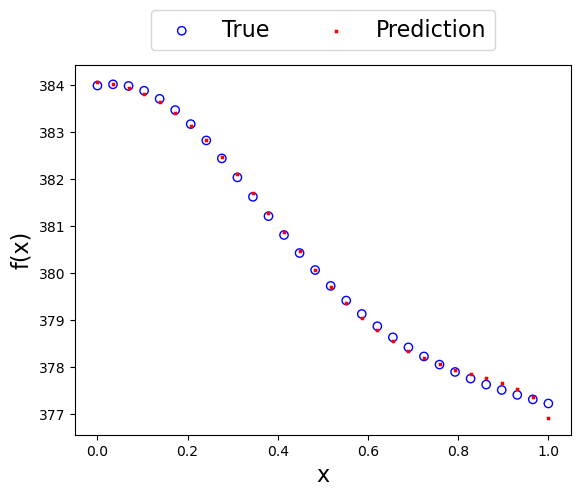

In [ ]:
plt.figure()
plt.scatter(X,Y,facecolors='none', edgecolors='b', label='True')
plt.scatter(X,pred_train, color='red',marker="x",s=4,label='Prediction')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
plt.savefig('xsinx_train.png')
plt.show()